In [1]:
                                                                                                                                                                                        # This Python 3 environment comes with many helpful analytics libraries installed
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib.pyplot as plt


In [2]:
import re
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from matplotlib import pyplot as plt
print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE
from kaggle_datasets import KaggleDatasets

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Tensorflow version 2.11.0


In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Thu Jun  1 23:13:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# NEW on TPU in TensorFlow 24: shorter cross-compatible TPU/GPU/multi-GPU/cluster-GPU detection code

try: # detect TPUs
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect() # TPU detection
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # detect GPUs
    strategy = tf.distribute.MirroredStrategy() # for GPU or multi-GPU machines
    #strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
    #strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy() # for clusters of multi-GPU machines

print("Number of accelerators: ", strategy.num_replicas_in_sync)

In [4]:
 !pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00


In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
#from keras_preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
#from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Conv2D,MaxPooling2D,Bidirectional, LSTM, Dense, Input, Flatten,Dropout,GlobalMaxPool1D,MaxPooling1D,Concatenate
from tensorflow.keras.layers import SpatialDropout1D

****

****DATA CLeaning****

In [21]:
#load csv files
#df1=pd.read_csv('/kaggle/input/simpson-original-data/image_sentiment1.csv')
df1=pd.read_csv('/kaggle/input/simpson-attrbutes/simpson_attr_info.csv')
#df=pd.read_csv('/gdrive/MyDrive/sumana_nuig/mvsa_multiple/msva-multiple_jointlabel.csv')
#df1=pd.read_csv('/kaggle/input/mvsa-multiple-obj-att-clean/mvsa_multiple_attr_clean.csv')
#df1=pd.read_csv('/kaggle/input/mvsa-attributes/mvsa_attr_info1.csv')
#df1=df1.dropna()

#df1=df1.iloc[:100:,]
df1.shape

#df1[:2]

(2830, 9)

In [24]:
#df1=df1[df1['Image_Path']]
df1[:2]

,img_path,text,object_names,object_score,att_name,att_score,joint_sentiment,class_att,bbox
0,img00021.jpg,white power movement new book connect movement...,"['eye', 'man', 'man', 'man', 'sign', 'sign', '...","[0.5621907711029053, 0.5024511814117432, 0.489...","['black', 'sitting', 'sitting', 'sitting', 'wh...","[0.4743715524673462, 0.18493443727493286, 0.15...",negative,"['eye black', 'man sitting', 'man sitting', 'm...","[[525.07763671875, 236.52786254882812, 609.050..."
1,img00024.jpg,lhate lama youral hat usiw anyth work jour tor...,"['floor', 'writing', 'writing', 'writing', 'wr...","[0.5603692531585693, 0.4662087559700012, 0.462...","['wooden', 'white', 'white', 'white', 'white',...","[0.304502934217453, 0.5460624694824219, 0.6122...",negative,"['floor wooden', 'writing white', 'writing whi...","[[0.0, 721.5868530273438, 416.1690368652344, 9..."


In [23]:
df1.joint_sentiment.value_counts()
#df1.joint_label.value_counts()

neutral     1016
positive    1016
negative     798
Name: joint_sentiment, dtype: int64

In [ ]:
#df1,df2,df3,df4 = np.array_split(dff, 4)
#print(df1.shape,df2.shape,df3.shape,df4.shape)
#df=df1.copy()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False # if autocompletion doesnot work in kaggle notebook | hit tab

**Sentiment of Combined text: which is concatenation of image description and Caption Text with that image **

**Combined Text Features Extraction**

**Visual Features Extraction**

In [6]:
from tensorflow.keras.applications import VGG16,VGG19,ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from keras.layers import Input,Dense, Dropout, Flatten,BatchNormalization,concatenate,Bidirectional,LSTM
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt

**Object visual featutes**

In [7]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define ResNet50 model with modified pooling layer
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
image_reslayer = resnet_model.output
image_reslayer= GlobalAveragePooling2D()(image_reslayer)
image_reslayer= Dense(256, activation='relu')(image_reslayer)
rmodel = Model(inputs=resnet_model.input, outputs=image_reslayer)

def extract_global_features(images):
    """Extract 256 features for a set of images using ResNet50 model"""
    # Convert images to numpy array
    image = np.array(images)
    
    # Preprocess the input data
    image = preprocess_input(image)
    
    # Use ResNet50 to extract features
    image_features = rmodel.predict(image)
    
    # Return 256 features
    return image_features


94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Load 100 images
#with strategy.scope(): #when TPU is used
with tf.device('/device:GPU:0'): #when GPU is used
    images = []
    #collect global image features
    import cv2
    #path='/gdrive/MyDrive/sumana_nuig/mvsa_multiple/MVSA/data/'
    path='/kaggle/input/mvsasingle/MVSA_Single/data/'
    #path='/kaggle/input/mvsamultiple/MVSA/data/'
    #path='/kaggle/input/simpson-original-data/Dataset/Dataset/'

    image_files=[]
    img_size=(224,224)
    for file in df['img_path']:
        image=cv2.imread(path+file)
        try:
            whole_image = cv2.resize(image, img_size)
        except:
            print('error')
        else:
            pass
        image = img_to_array(whole_image)
        #img = image.load_img(img_path, target_size=(224, 224))
        #img = image.img_to_array(img)
        images.append(image)
        image_files.append(file)
    # Extract features using ResNet50
    global_features = extract_global_features(images)

    # Print shape of extracted features
    print(global_features.shape)  # Output: (100, 256)
    #print array of files
    #print(image_files.shape)

In [13]:

# Define ResNet50 model with modified pooling layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
object_reslayer = base_model.output
object_reslayer= GlobalAveragePooling2D()(object_reslayer)
object_reslayer= Dense(256, activation='relu')(object_reslayer)
object_model = Model(inputs=base_model.input, outputs=object_reslayer)

def extract_object_features(images):
    """Extract 256 features for a set of images using ResNet50 model"""
    # Convert images to numpy array
    image = np.array(images)
    
    # Preprocess the input data
    image = preprocess_input(image)
    
    # Use ResNet50 to extract features
    object_features = object_model.predict(image)
    
    # Return 256 features
    return object_features

In [11]:
import torch
import torchvision
model= torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Set the model to evaluation mode
model.eval()
print('faster rcnn')

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 152MB/s]  


faster rcnn


4
small objects
0


2023-06-01 23:41:04.236263: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:433] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR


UnimplementedError: Graph execution error:

Detected at node 'model_2/conv1_conv/Conv2D' defined at (most recent call last):
    File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_31/4278381653.py", line 67, in <module>
      concatenated_object_features=extract_object_features(object_regions)
    File "/tmp/ipykernel_31/434063394.py", line 17, in extract_object_features
      object_features = object_model.predict(image)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2079, in predict_step
      return self(x, training=False)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/opt/conda/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'model_2/conv1_conv/Conv2D'
DNN library is not found.
	 [[{{node model_2/conv1_conv/Conv2D}}]] [Op:__inference_predict_function_14048]

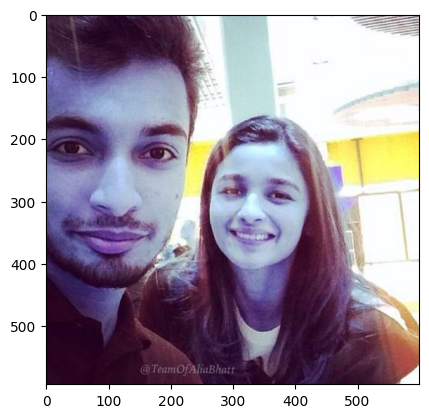

In [14]:
import cv2
image=cv2.imread("/kaggle/input/mvsasingle/MVSA_Single/data/2490.jpg")
#G:\My Drive\sumana_nuig\mvsa\data
#im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#showarray(im_rgb)
plt.imshow(image)
#image=cv2.imread(im)
whole_image=cv2.resize(image,(128,128))
image_tensor = torch.from_numpy(image).permute(2, 0, 1).float() # Convert the image to a PyTorch tensor
image_tensor /= 255.0 # Normalize the image
image_tensor = image_tensor.unsqueeze(0) # Add a batch dimension to the tensor
output = model(image_tensor)  # Pass the image tensor through the model
object_regions = []
object_features = []
objects=[]
number_of_objects=len(output[0]['boxes'])
print(number_of_objects)
#pyplot.imshow(image)
for i in range(0,len(output[0]['boxes'])<=10):
#for i in range(0,5):
    box = output[0]['boxes'][i]
    x1,x2,y1,y2=box
    x1=round(x1.item())
    y1=round(y1.item())
    x2=round(x2.item())
    y2=round(y2.item())
    area = (x2 - x1) * (y2 - y1)
    if area>=4096:
        try:
            object_region = image[y1:y2, x1:x2]
            object_region = cv2.resize(object_region, (128, 128))
            #object_regions.append(object_region)
            object_region = img_to_array(object_region)
            object_regions.append(object_region)
        except:
            #print(ValueError)
            print('Error') 
            pass
        else:
            pass
    else:
        print('small objects')
        continue
print(len(object_regions))
if len(object_regions)>0: 
    new_objfeatures=extract_object_features(object_regions)
    print('objects features',new_objfeatures.shape)
    objects.append(new_objfeatures.reshape(-1))
    #concatenated_features = np.concatenate(new_objfeatures, axis=0)
    #print(concatenated_features.shape)
    concatenated_features = np.vstack(new_objfeatures)
    print('concatenated features',concatenated_features.shape)
    concatenated_object_features = np.mean(concatenated_features, axis=0)
    print('mean concatenated features',concatenated_object_features.shape)
    concatenated_object_features = concatenated_object_features.reshape(-1)

    print('reshape mean concatenated features',concatenated_object_features.shape)
    #local_object_features.append(concatenated_object_features)
else:

    #try:
    #image=cv2.imread(path+file)
    object_region = cv2.resize(image, (128, 128))
    object_region = img_to_array(object_region)
    object_regions.append(object_region)

    concatenated_object_features=extract_object_features(object_regions)
    objects.append(new_objfeatures.reshape(-1))
    concatenated_object_features = concatenated_object_features.reshape(-1) 
    #except:
      #print(ValueError)
         #print('error') 
        #pass
    #new_objfeatures=extract_object_features(object_regions)
    #concatenated_object_features = new_objfeatures.reshape(-1)
    #print('reshape whole concatenated features',concatenated_object_features.shape)
local_object_features.append(concatenated_object_features)
print(file)
print(len(local_object_features))
print(np.array(local_object_features).shape)
print(len(objects.shape))

In [ ]:
#Object features collection
with strategy.scope():
    #import cv2
    #path='/kaggle/input/mvsamultiple/MVSA/data/'

    path='/kaggle/input/mvsasingle/MVSA_Single/data/'
    #path='/kaggle/input/mvsamultiple/MVSA/data/'
    #path='/kaggle/input/mvsamultiple/MVSA/data/'
    local_object_features = []
    #Collect object features from each image

    for file in df['img_path']:
        image=cv2.imread(path+file)
        whole_image=cv2.resize(image,(128,128))
        image_tensor = torch.from_numpy(image).permute(2, 0, 1).float() # Convert the image to a PyTorch tensor
        image_tensor /= 255.0 # Normalize the image
        image_tensor = image_tensor.unsqueeze(0) # Add a batch dimension to the tensor
        output = model(image_tensor)  # Pass the image tensor through the model
        object_regions = []
        object_features = []
        number_of_objects=len(output[0]['boxes'])
        print(number_of_objects)
        #pyplot.imshow(image)
        for i in range(len(output[0]['boxes'])):
        #for i in range(0,5):
            box = output[0]['boxes'][i]
            x1,x2,y1,y2=box
            x1=round(x1.item())
            y1=round(y1.item())
            x2=round(x2.item())
            y2=round(y2.item())
            area = (x2 - x1) * (y2 - y1)
            if area>=4096:
                try:
                    object_region = image[y1:y2, x1:x2]
                    object_region = cv2.resize(object_region, (128, 128))
                    #object_regions.append(object_region)
                    object_region = img_to_array(object_region)
                    object_regions.append(object_region)
                except:
                    #print(ValueError)
                    print('Error') 
                    pass
                else:
                    pass
            else:
                print('small objects')
                continue
        print(len(object_regions))
        if len(object_regions)>0: 
            new_objfeatures=extract_object_features(object_regions)
            print('objects features',new_objfeatures.shape)
            #concatenated_features = np.concatenate(new_objfeatures, axis=0)
            #print(concatenated_features.shape)
            concatenated_features = np.vstack(new_objfeatures)
            print('concatenated features',concatenated_features.shape)
            concatenated_object_features = np.mean(concatenated_features, axis=0)
            print('mean concatenated features',concatenated_object_features.shape)
            concatenated_object_features = concatenated_object_features.reshape(-1)

            print('reshape mean concatenated features',concatenated_object_features.shape)
            #local_object_features.append(concatenated_object_features)
        else:

            #try:
            #image=cv2.imread(path+file)
            object_region = cv2.resize(image, (128, 128))
            object_region = img_to_array(object_region)
            object_regions.append(object_region)

            concatenated_object_features=extract_object_features(object_regions)
            concatenated_object_features = concatenated_object_features.reshape(-1) 
            #except:
              #print(ValueError)
                 #print('error') 
                #pass
            #new_objfeatures=extract_object_features(object_regions)
            #concatenated_object_features = new_objfeatures.reshape(-1)
            #print('reshape whole concatenated features',concatenated_object_features.shape)
        local_object_features.append(concatenated_object_features)
        print(file)
print(len(local_object_features))
print(np.array(local_object_features).shape)

In [ ]:
"""# it worked
#Object features collection
with strategy.scope():
    #import cv2
    #path='/kaggle/input/mvsamultiple/MVSA/data/'

    path='/kaggle/input/mvsasingle/MVSA_Single/data/'
    #path='/kaggle/input/mvsamultiple/MVSA/data/'
    #path='/kaggle/input/mvsamultiple/MVSA/data/'
    local_object_features = []
    #Collect object features from each image

    for file in df['img_path']:
        image=cv2.imread(path+file)
        whole_image=cv2.resize(image,(128,128))
        image_tensor = torch.from_numpy(image).permute(2, 0, 1).float() # Convert the image to a PyTorch tensor
        image_tensor /= 255.0 # Normalize the image
        image_tensor = image_tensor.unsqueeze(0) # Add a batch dimension to the tensor
        output = model(image_tensor)  # Pass the image tensor through the model
        object_regions = []
        object_features = []
        number_of_objects=len(output[0]['boxes'])
        print(number_of_objects)
        #pyplot.imshow(image)
        for i in range(len(output[0]['boxes'])):
        #for i in range(0,5):
            box = output[0]['boxes'][i]
            x1,x2,y1,y2=box
            x1=round(x1.item())
            y1=round(y1.item())
            x2=round(x2.item())
            y2=round(y2.item())
            area = (x2 - x1) * (y2 - y1)
            if area>=4096:
                try:
                    object_region = image[y1:y2, x1:x2]
                    object_region = cv2.resize(object_region, (128, 128))
                    #object_regions.append(object_region)
                    object_region = img_to_array(object_region)
                    object_regions.append(object_region)
                except:
                    #print(ValueError)
                    print('Error') 
                    pass
                else:
                    pass
            else:
                print('small objects')
                continue
        print(len(object_regions))
        if len(object_regions)>0: 
            new_objfeatures=extract_object_features(object_regions)
            print('objects features',new_objfeatures.shape)
            #concatenated_features = np.concatenate(new_objfeatures, axis=0)
            #print(concatenated_features.shape)
            concatenated_features = np.vstack(new_objfeatures)
            print('concatenated features',concatenated_features.shape)
            concatenated_object_features = np.mean(concatenated_features, axis=0)
            print('mean concatenated features',concatenated_object_features.shape)
            concatenated_object_features = concatenated_object_features.reshape(-1)

            print('reshape mean concatenated features',concatenated_object_features.shape)
            #local_object_features.append(concatenated_object_features)
        else:

            #try:
            #image=cv2.imread(path+file)
            object_region = cv2.resize(image, (128, 128))
            object_region = img_to_array(object_region)
            object_regions.append(object_region)

            concatenated_object_features=extract_object_features(object_regions)
            concatenated_object_features = concatenated_object_features.reshape(-1) 
            #except:
              #print(ValueError)
                 #print('error') 
                #pass
            #new_objfeatures=extract_object_features(object_regions)
            #concatenated_object_features = new_objfeatures.reshape(-1)
            #print('reshape whole concatenated features',concatenated_object_features.shape)
        local_object_features.append(concatenated_object_features)
        print(file)
print(len(local_object_features))
print(np.array(local_object_features).shape)
"""

In [ ]:
print(len(local_object_features))
print(np.array(local_object_features).shape)

In [ ]:
img_file=df['img_path'].tolist()
#image features
print((np.array(img_file)).shape)#a
print((np.array(global_features)).shape)#b 
print((np.array(local_object_features)).shape)#c
#text features

#np.savez('my_arrays.npz', a=arr1, b=arr2)
np.savez('/kaggle/working/mvsa_single446.npz',
            a=np.array(img_file),
            b=np.array(global_features),
            c=np.array(local_object_features))

In [ ]:
"""
img_file=df['img_path'].tolist()
#image features
print((np.array(img_file)).shape)#a
print((np.array(global_features)).shape)#b 
print((np.array(local_object_features)).shape)#c
#text features
print((np.array(text_features)).shape)#d
print((np.array(class_features)).shape)#e
print((np.array(class_attributes_features)).shape)#f
print((np.array(combined_text_class_features)).shape)#g
print((np.array(combined_text_att_features)).shape)#h
#np.savez('my_arrays.npz', a=arr1, b=arr2)
np.savez('/kaggle/working/mvsa_single_df1.npz',
            a=np.array(img_file),
            b=np.array(global_features),
            c=np.array(local_object_features),
            d=np.array(text_features),
            e=np.array(class_features),
            f=np.array(class_attributes_features),
            g=np.array(combined_text_class_features),
            h=np.array(combined_text_att_features))#h
"""

In [ ]:

"""
#loading .npz file
data = np.load('/gdrive/MyDrive/sumana_nuig/mvsa/mvsa_multiple_300_sample.npz')

# Access the variables inside the npz file
img_file = data['a']
global_features = data['b']
local_object_features = data['c']
print(global_features.shape,local_object_features.shape)
"""